In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
data = pd.read_csv("insurance.csv")

In [46]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
Smoker = pd.get_dummies(data["smoker"] , drop_first= True).astype(int)

In [50]:
data["Smoker"] = Smoker

In [66]:
Male = pd.get_dummies(data["sex"] , drop_first= True).astype(int)
data["male"] = Male

<Axes: xlabel='sex', ylabel='count'>

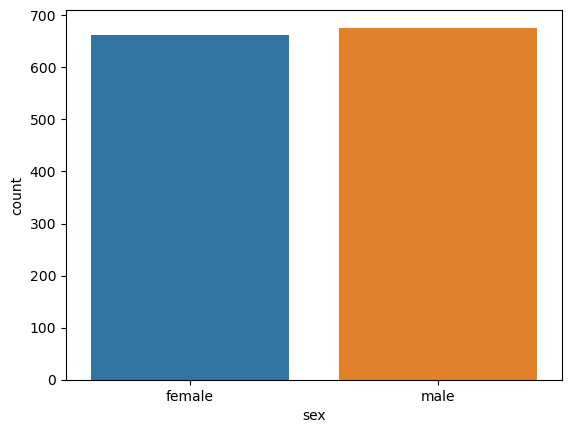

In [68]:
sns.countplot(x = "sex",data = data)

<Axes: xlabel='sex', ylabel='charges'>

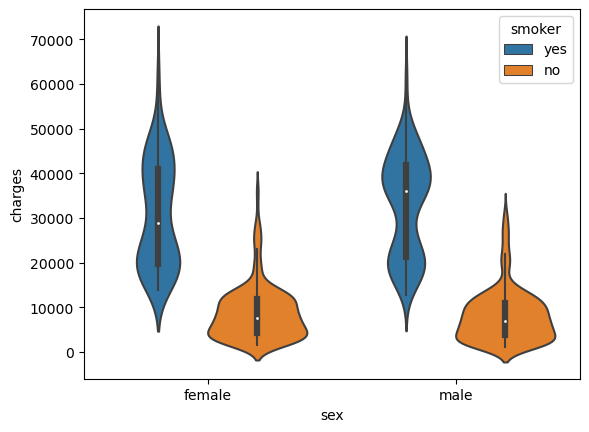

In [82]:
sns.violinplot(x = "sex"  ,y = "charges", data = data, hue = "smoker")


<Axes: xlabel='age', ylabel='charges'>

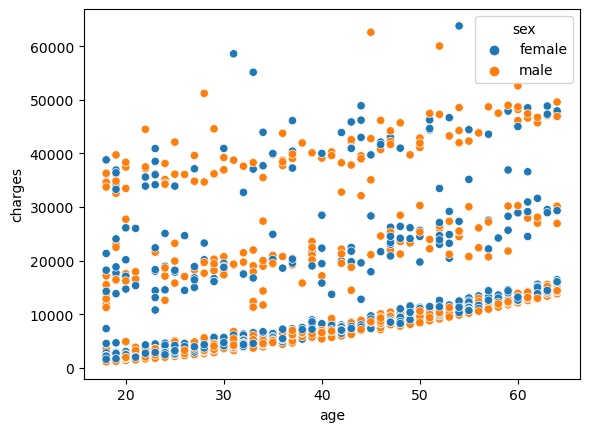

In [86]:
sns.scatterplot(x = "age"  ,y = "charges", data = data, hue = "sex")

<Axes: xlabel='age', ylabel='charges'>

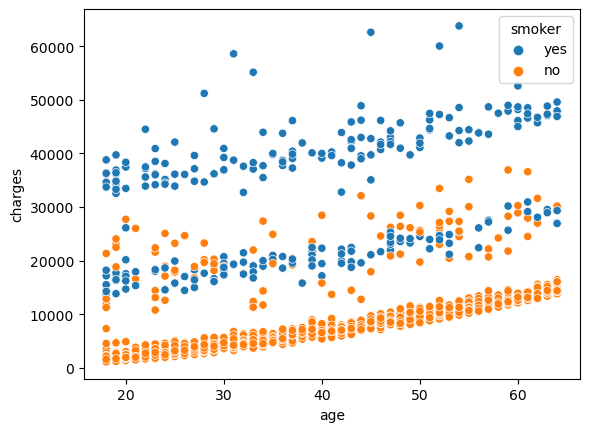

In [88]:
sns.scatterplot(x = "age"  ,y = "charges", data = data, hue = "smoker")

<Axes: xlabel='bmi', ylabel='charges'>

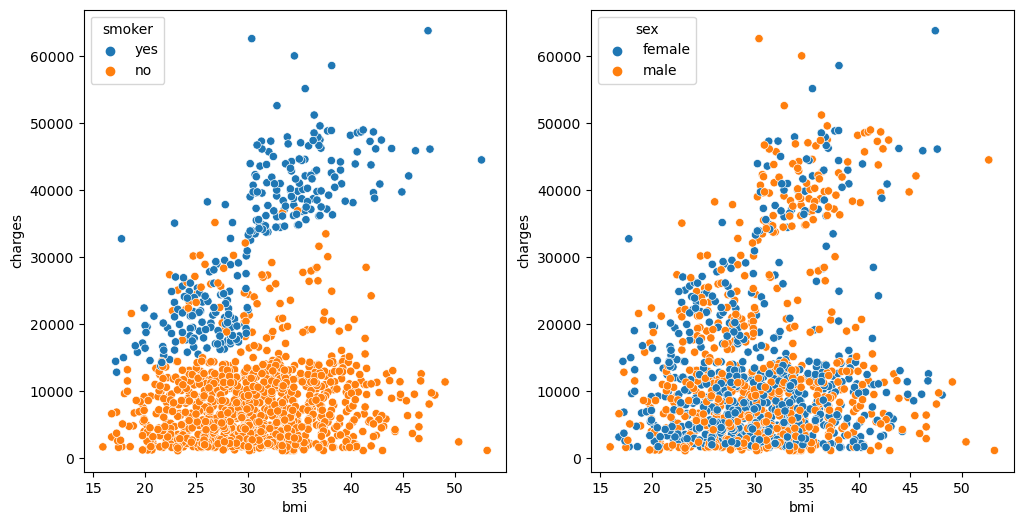

In [100]:
fig , ax = plt.subplots(nrows = 1 , ncols = 2 , figsize = (12,6))
sns.scatterplot(x = "bmi"  ,y = "charges", data = data, hue = "smoker" ,  ax = ax[0])
sns.scatterplot(x = "bmi"  ,y = "charges", data = data, hue = "sex" , ax = ax[1])

In [106]:
data.drop(["sex" , "smoker" , "region"] , axis = 1 , inplace = True)

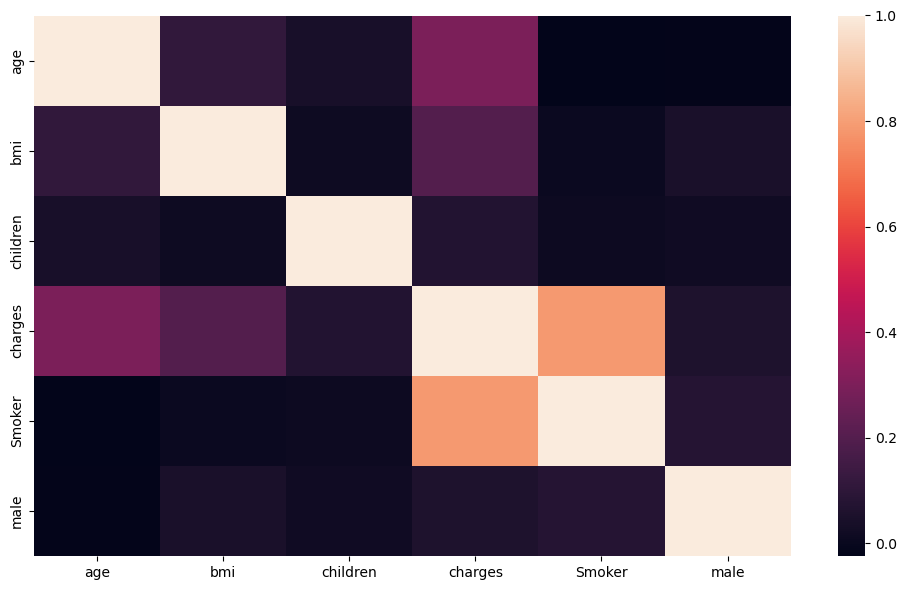

In [134]:
plt.figure(figsize= (10,6))
sns.heatmap(data.corr() , fmt='.2f')
plt.tight_layout()

In [136]:
data.corr()

,age,bmi,children,charges,Smoker,male
age,1.000000,0.109272,0.042469,0.299008,-0.025019,-0.020856
bmi,0.109272,1.000000,0.012759,0.198341,0.003750,0.046371
children,0.042469,0.012759,1.000000,0.067998,0.007673,0.017163
charges,0.299008,0.198341,0.067998,1.000000,0.787251,0.057292
Smoker,-0.025019,0.003750,0.007673,0.787251,1.000000,0.076185
male,-0.020856,0.046371,0.017163,0.057292,0.076185,1.000000


In [198]:
x = data.drop(["charges" ,"children"  ,"male" ] , axis = 1)
y = pd.DataFrame(data["charges"])


In [200]:
from sklearn.model_selection import train_test_split
train_input, test_input , train_output , test_output = train_test_split(x,y , test_size= 0.2)

In [202]:
train_input.shape
test_input.shape

(268, 3)

In [204]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

train_in = scalar.fit_transform(train_input)
test_in = scalar.transform(test_input)

array([[-1.35663306, -0.02703901, -0.91354544, -0.51891848, -1.03616766],
       [ 0.34371039,  1.43138833, -0.91354544, -0.51891848,  0.96509478],
       [-0.15222311, -0.44594899,  0.73762622, -0.51891848,  0.96509478],
       ...,
       [ 0.76879625, -0.60110083, -0.08795961, -0.51891848, -1.03616766],
       [-1.4274807 , -1.3303145 , -0.91354544, -0.51891848,  0.96509478],
       [ 0.69794861,  1.74985791,  2.38879787, -0.51891848, -1.03616766]])

In [206]:
from sklearn.svm import SVR

In [238]:
model = SVR()
model.fit(train_in,train_output)


C:\Users\aman1\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [240]:
predict = model.predict(test_in)
post = predict[0:10]

for i in range(0,9):
    print(pree[i] , post[i])

[9513.31656246] 9335.737087383039
[9483.21306583] 9389.571749695258
[9335.5840298] 9428.27565898673
[9336.26556721] 9578.312783099524
[9362.67029655] 9373.342106264345
[9322.8688742] 9572.392545377566
[9484.81448809] 9353.082948164278
[9341.60449673] 9275.534133939129
[9344.08381354] 9455.570906402667


In [228]:
post = train_output[1:10].values
print(post)

[[13047.33235]
 [ 4454.40265]
 [12485.8009 ]
 [ 2730.10785]
 [11396.9002 ]
 [31620.00106]
 [36898.73308]
 [ 9144.565  ]
 [ 2585.269  ]]
